<a href="https://colab.research.google.com/github/Tanulshn/Zero-to-One-Valuation/blob/main/Valuation_0_1_individual_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective 
To derive an alternative notation for the valuation (either PE or PB) of individual stocks to be compared with one another.



# Package Imported

For pandas, numpy and visualisation
- import pandas as pd
- import numpy as np
- import seaborn as sns
- import matplotlib.pyplot as plt
- import pylab
- %matplotlib inline
- plt.style.use('seaborn-darkgrid')

For Standardisation
- from sklearn.preprocessing import StandardScaler


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# For q-q plot
import scipy.stats
import pylab

plt.style.use('seaborn-darkgrid')

import glob

import warnings
warnings.simplefilter(action='ignore')

In [18]:
#data_std= pd.DataFrame()

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0-1: Valuation/CSV Files/KRBL.csv')
#Convert the datatype from object to float
for i in ['Std','Mcap']:
  df[i] = pd.to_numeric(df[i], errors= 'coerce').round(2)

df = df[['Date','Std','Mcap']]
df['Date'] = pd.to_datetime(df['Date'], dayfirst=False) # Use dayfirst function carefully
df.set_index('Date', inplace=True) # Set the Date Column to Index
df = df.resample('m').last() # Set the frequency to Business days
#df.fillna(method='ffill') # Fill the nan values

df.head(20)



,Std,Mcap
Date,,
2010-02-28,7.32,619.0
2010-03-31,5.40,580.0
2010-04-30,6.34,679.0
2010-05-31,5.40,581.0
2010-06-30,5.69,569.0
2010-07-31,5.74,571.0
2010-08-31,5.70,569.0
2010-09-30,8.12,874.0
2010-10-31,11.11,1200.0


In [19]:
df.tail(20)

,Std,Mcap
Date,,
2019-12-31,12.30,6714.0
2020-01-31,11.41,6219.0
2020-02-29,10.77,5901.0
2020-03-31,5.67,3208.0
2020-04-30,8.07,4510.0
2020-05-31,7.88,4410.0
2020-06-30,10.55,5779.0
2020-07-31,11.60,6368.0
2020-08-31,11.23,6172.0


### Data PreProcessing 

In [20]:
# #df_std = df[:-1] 
# # Since the data is till 21 June only, Lets remove the last month and keep it til May 2021
# df_std.shape

(137, 2)

In [30]:
df.shape

(138, 2)

In [21]:
df.tail()

,Std,Mcap
Date,,
2021-03-31,7.54,4222.0
2021-04-30,7.76,4352.0
2021-05-31,8.83,4949.0
2021-06-30,9.89,5546.0
2021-07-31,11.62,6512.0


In [29]:
# Check for null values
df.isnull().sum()

Std     0
Mcap    0
dtype: int64

The dataframes are ready to be used for further procesing
# Variable transformation

## For Standalone variables

In [23]:
  # Import packages
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [24]:
# Create a function for transformation
def scale(series, monthly=False):
  """ Returns a Standardised series based on the Standard scale
  Monthly - Whether to perform on monthly data or daily data
  """

  if monthly:
    if len(series)>84:
      #print('No of months available is {}. Hence, the scale function can be applied.'.format(len(series)))
      norm = sc.fit(series[-84:])
      scaled_values = norm.transform(series)
    else:
      print('No of months available is {}. The scale function can not be applied.'.format(len(series)))

 
  else:
    if len(series)>1750:
      print('No of days available is {}. Hence, the scale function can be applied.'.format(len(series)))
      sc.fit_transform(series[-1750:])
      scaled_values = sc.transform(series)
    else:
      print('No of days available is {}. The scale function can not be applied.'.format(len(series)))

  
  return scaled_values


In [31]:
df.tail()


,Std,Mcap
Date,,
2021-03-31,7.54,4222.0
2021-04-30,7.76,4352.0
2021-05-31,8.83,4949.0
2021-06-30,9.89,5546.0
2021-07-31,11.62,6512.0


### Scaled Valuations: As of today

In [32]:
Scaled_std_2021 = df.copy()
Scaled_std_2021['Std'] = scale(df[['Std']],monthly = True).round(3)

Scaled_std_2021.tail()
  

,Std,Mcap
Date,,
2021-03-31,-1.275,4222.0
2021-04-30,-1.242,4352.0
2021-05-31,-1.080,4949.0
2021-06-30,-0.919,5546.0
2021-07-31,-0.657,6512.0


In [27]:
# # Create Visualisation

# for col,i in enumerate(['Std_Grasim ind', 'Std_Bank of Baroda', 'Std_Exide Ind',
#        'Std_Adani Ports', 'Std_Dr Reddys', 'Std_Jindal Steel', 'Std_IOC',
#        'Std_HDFC Bank', 'Std_Bajaj Auto', 'Std_Divis', 'Std_Havells',
#        'Std_Dabur', 'Std_CCIL', 'Std_Axis', 'Std_Bank of India',
#        'Std_Colgate Palmolive', 'Std_HUL', 'Std_Adani Power',
#        'Std_Asian Paints', 'Std_Canara Bank', 'Std_GodrejConsumer',
#        'Std_ICICI', 'Std_Kotak bank', 'Std_Hindalco', 'Std_Oil India',
#        'Std_L&T', 'Std_Pidilite', 'Std_TATA Steel', 'Std_NALCO',
#        'Std_United Spirits', 'Std_Wipro', 'Std_Bajaj Finserv', 'Std_Vedanta',
#        'Std_Britannia', 'Std_Bosch', 'Std_Cipla', 'Std_GSK Pharma',
#        'Std_HCL Tech', 'Std_Cmmins', 'Std_HPCL', 'Std_BergerPaint',
#        'Std_Hero Motors', 'Std_Infosys', 'Std_ITC', 'Std_JSW Steel', 'Std_M&M',
#        'Std_Maruti', 'Std_Jubilant', 'Std_Mindtree', 'Std_Marico', 'Std_MRF',
#        'Std_ONGC', 'Std_PageInd', 'Std_PNB', 'Std_Sun Pharma',
#        'Std_Shree Cement', 'Std_Reliance Industries', 'Std_SBI Bank',
#        'Std_TATA Power', 'Std_Ultratech', 'Std_TATA GloBev', 'Std_TechM',
#        'Std_TCS', 'Std_TATA Motors', 'Std_Titan']):
#   plt.figure(i)
#   Scaled_std_2021[i].plot()
#   plt.axvline(x = Scaled_std_2021.index[-84], color='g')
#   plt.axhline(y =0, color='g')
#   plt.title('{}. The Scaled Value plot for {}'.format(col+1, i))
#   plt.show()

KeyError: ignored

<Figure size 432x288 with 0 Axes>

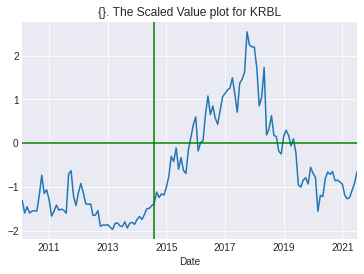

In [34]:
Scaled_std_2021['Std'].plot()
plt.axvline(x = Scaled_std_2021.index[-84], color='g')
plt.axhline(y =0, color='g')
plt.title('{}. The Scaled Value plot for KRBL')
plt.show()

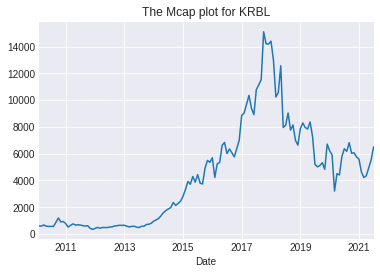

In [37]:
Scaled_std_2021['Mcap'].plot()
#plt.axvline(x = Scaled_std_2021.index[-84], color='g')
#plt.axhline(y =0, color='g')
plt.title('The Mcap plot for KRBL')
plt.show()

In [ ]:
# # Define a function to plot visualistion for the Scaled values

# def scale_plot(df):
#   print('The Valuation of The stock is:', df['Value'][-1],' and the scaled value is: ',df['S_value'][-1])

#   print('\n')
#   plt.figure(figsize=(15,8))
#   plt.subplot(1,2,1)
#   sns.distplot(df['Value'], bins=50)
#   plt.axvline(x = df['Value'][-1], color='b')
#   print('The normalised distribution of the Values')

#   plt.subplot(1,2,2)
#   sns.distplot(df['S_value'], bins=50)
#   plt.axvline(x = df['S_value'][-1], color='b')
#   print('The normalised distribution of the Scaled Values')

### As per custom month
Custom Selection for deriving Valuation equivalence at a certain point.

- Pass a snippet of the main series as arguement. (Starting from the beginning and ending at a dersired month/date)
- pass scale to determine if the past 7 years data can be figured out or not
- Save the output as a seperate dataframe. and join it with the original df with timestamp as reference.
 

Although I am creating these functions for manual operation, we will have to consider automating the same in the future.

In [ ]:
# Pass the end date for reference (format yyyy-mm)
V_2018 = scale(df_m[['Value']][:'2018-12'], monthly=True).round(3)
V_2018 = pd.DataFrame(V_2018, index = df_m[['Value']][:'2018-12'].index , columns= ['Scaled_2018'])
V_2018.tail()


In [ ]:
V_2019 = scale(df_m[['Value']][:'2019-12'], monthly=True).round(3)
V_2019 = pd.DataFrame(V_2019, index = df_m[['Value']][:'2019-12'].index , columns= ['Scaled_2019'])
V_2019.tail()

In [ ]:
V_2020 = scale(df_m[['Value']][:'2020-12'], monthly=True).round(3)
V_2020 = pd.DataFrame(V_2020, index = df_m[['Value']][:'2020-12'].index , columns= ['Scaled_2020'])
V_2020.tail()

In [ ]:
V_2014 = scale(df_m[['Value']][:'2014-12'], monthly=True).round(3)
V_2014 = pd.DataFrame(V_2014, index = df_m[['Value']][:'2014-12'].index , columns= ['Scaled_2014'])
V_2014.tail()

In [ ]:
V_2010 = scale(df_m[['Value']][:'2010-12'], monthly=True).round(3)
V_2010 = pd.DataFrame(V_2010, index = df_m[['Value']][:'2010-12'].index , columns= ['Scaled_2010'])
V_2010.tail()

In [ ]:
V_2008 = scale(df_m[['Value']][:'2008-12'], monthly=True).round(3)
V_2008 = pd.DataFrame(V_2008, index = df_m[['Value']][:'2008-12'].index , columns= ['Scaled_2008'])
V_2008.tail()

In [ ]:
V_2017 = scale(df_m[['Value']][:'2017-12'], monthly=True).round(3)
V_2017 = pd.DataFrame(V_2017, index = df_m[['Value']][:'2017-12'].index , columns= ['Scaled_2017'])
V_2017.tail()

In [ ]:
df_M_combined = df_m.join(V_2010, how= 'outer').join(V_2014, how= 'outer').join(V_2017, how= 'outer').join(V_2018, how= 'outer').join(V_2019, how= 'outer').join(V_2020, how= 'outer')

In [ ]:
df_M_combined.tail(50)

In [ ]:
plt.figure(figsize=(15,8))
df_M_combined['S_value'].plot()
df_M_combined['Scaled_2010'].plot()
df_M_combined['Scaled_2014'].plot()
df_M_combined['Scaled_2017'].plot()
df_M_combined['Scaled_2018'].plot()
df_M_combined['Scaled_2019'].plot()
df_M_combined['Scaled_2020'].plot()

plt.legend()
plt.show()


In [ ]:
df_M_combined['S_value']['2015-12':].plot()
#df_M_combined['Scaled_2014'].plot()

In [ ]:
df_M_combined['Scaled_2014'].plot()

## Include correlation with MCap too.


In [ ]:
df_m

In [ ]:
# Given by Lavi; glob- reading all the csv in a given folder.

# import glob
# import pandas as pd

# glued_data = pd.DataFrame()
# for file_name in glob.glob(directoryPath+'*.csv'):
#     x = pd.read_csv(file_name, low_memory=False)
#     glued_data = pd.concat([glued_data,x],axis=0) ## For converting no of csv to single csv.

In [ ]:
# import glob

# glued_data = pd.DataFrame()

# for file_name in glob.glob('/content/drive/MyDrive/Colab Notebooks/Time Series Analysis/Banks/Samople/'+'*.csv'):
#   print(file_name)

#   x = pd.read_csv(file_name)
#   # Seperating the file name form the address
#   co_name = file_name.split('/')[-1]
#   print(co_name)
  
#   # assigning a name 
#   x['Co_name'] = co_name

#   glued_data = pd.concat([glued_data,x], axis=0) ## For converting no of csv to single csv.

In [ ]:
# print(glued_data_r.tail())